In [2]:
from sklearn.datasets import load_iris
from sklearn.feature_selection import SelectKBest, chi2
import pandas as pd

iris = load_iris()
X, y = iris.data, iris.target

selector = SelectKBest(chi2, k=2)
X_new = selector.fit_transform(X, y)

selected_features = selector.get_support(indices=True)
feature_names = [iris.feature_names[i] for i in selected_features]

print("Selected features:", feature_names)


Selected features: ['petal length (cm)', 'petal width (cm)']


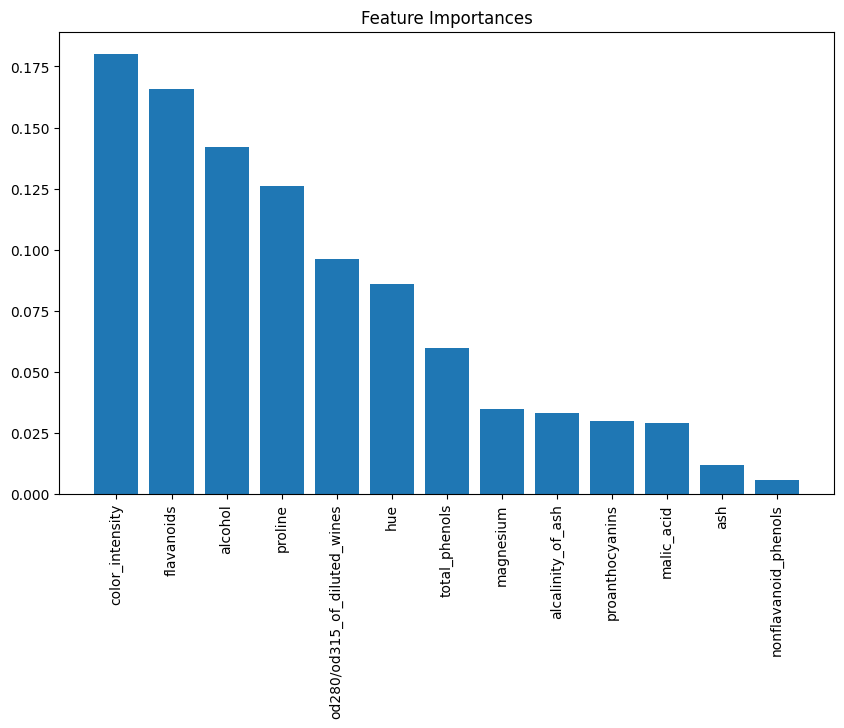

In [3]:
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt

wine = load_wine()
X_train, X_test, y_train, y_test = train_test_split(wine.data, wine.target, test_size=0.3, random_state=42)

rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

importances = rf.feature_importances_
indices = importances.argsort()[::-1]

plt.figure(figsize=(10, 6))
plt.title("Feature Importances")
plt.bar(range(X_train.shape[1]), importances[indices], align="center")
plt.xticks(range(X_train.shape[1]), [wine.feature_names[i] for i in indices], rotation=90)
plt.show()


In [4]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, test_size=0.3, random_state=42)


svc = SVC(kernel="linear", random_state=42)
rfe = RFE(estimator=svc, n_features_to_select=10)
rfe.fit(X_train, y_train)

y_pred = rfe.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy with RFE-selected features:", accuracy)


Accuracy with RFE-selected features: 0.9298245614035088


In [5]:
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error


diabetes = load_diabetes()
X_train, X_test, y_train, y_test = train_test_split(diabetes.data, diabetes.target, test_size=0.3, random_state=42)

lasso = Lasso(alpha=0.1)
lasso.fit(X_train, y_train)

y_pred = lasso.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error with Lasso:", mse)


Mean Squared Error with Lasso: 2775.165076183445


In [6]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris

cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, test_size=0.3, random_state=42)

model = LogisticRegression(max_iter=200)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


Accuracy: 1.0
Confusion Matrix:
 [[19  0  0]
 [ 0 13  0]
 [ 0  0 13]]


In [7]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, test_size=0.3, random_state=42)

svm = SVC(kernel="linear")
svm.fit(X_train, y_train)

y_pred = svm.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


Accuracy: 0.9649122807017544
Confusion Matrix:
 [[ 59   4]
 [  2 106]]


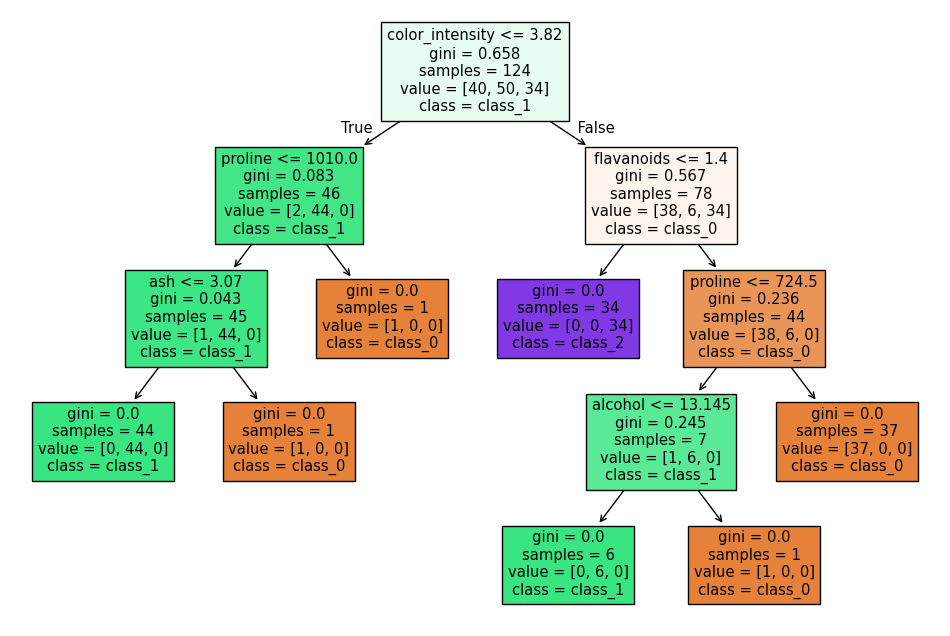

In [8]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

wine = load_wine()
X_train, X_test, y_train, y_test = train_test_split(wine.data, wine.target, test_size=0.3, random_state=42)

tree = DecisionTreeClassifier(random_state=42)
tree.fit(X_train, y_train)

plt.figure(figsize=(12, 8))
plot_tree(tree, feature_names=wine.feature_names, class_names=wine.target_names, filled=True)
plt.show()


In [9]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split

housing = fetch_california_housing()
X_train, X_test, y_train, y_test = train_test_split(housing.data, housing.target, test_size=0.3, random_state=42)

lr = LinearRegression()
lr.fit(X_train, y_train)

y_pred = lr.predict(X_test)
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("R-squared:", r2_score(y_test, y_pred))


Mean Squared Error: 0.5305677824766757
R-squared: 0.595770232606166


In [10]:
from sklearn.linear_model import Ridge
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

housing = fetch_california_housing()
X_train, X_test, y_train, y_test = train_test_split(housing.data, housing.target, test_size=0.3, random_state=42)

ridge = Ridge(alpha=1.0)
ridge.fit(X_train, y_train)

y_pred_ridge = ridge.predict(X_test)
print("Mean Squared Error:", mean_squared_error(y_test, y_pred_ridge))
print("R-squared:", r2_score(y_test, y_pred_ridge))


Mean Squared Error: 0.5305052690933701
R-squared: 0.5958178603951634


Mean Squared Error: 0.495235205629094


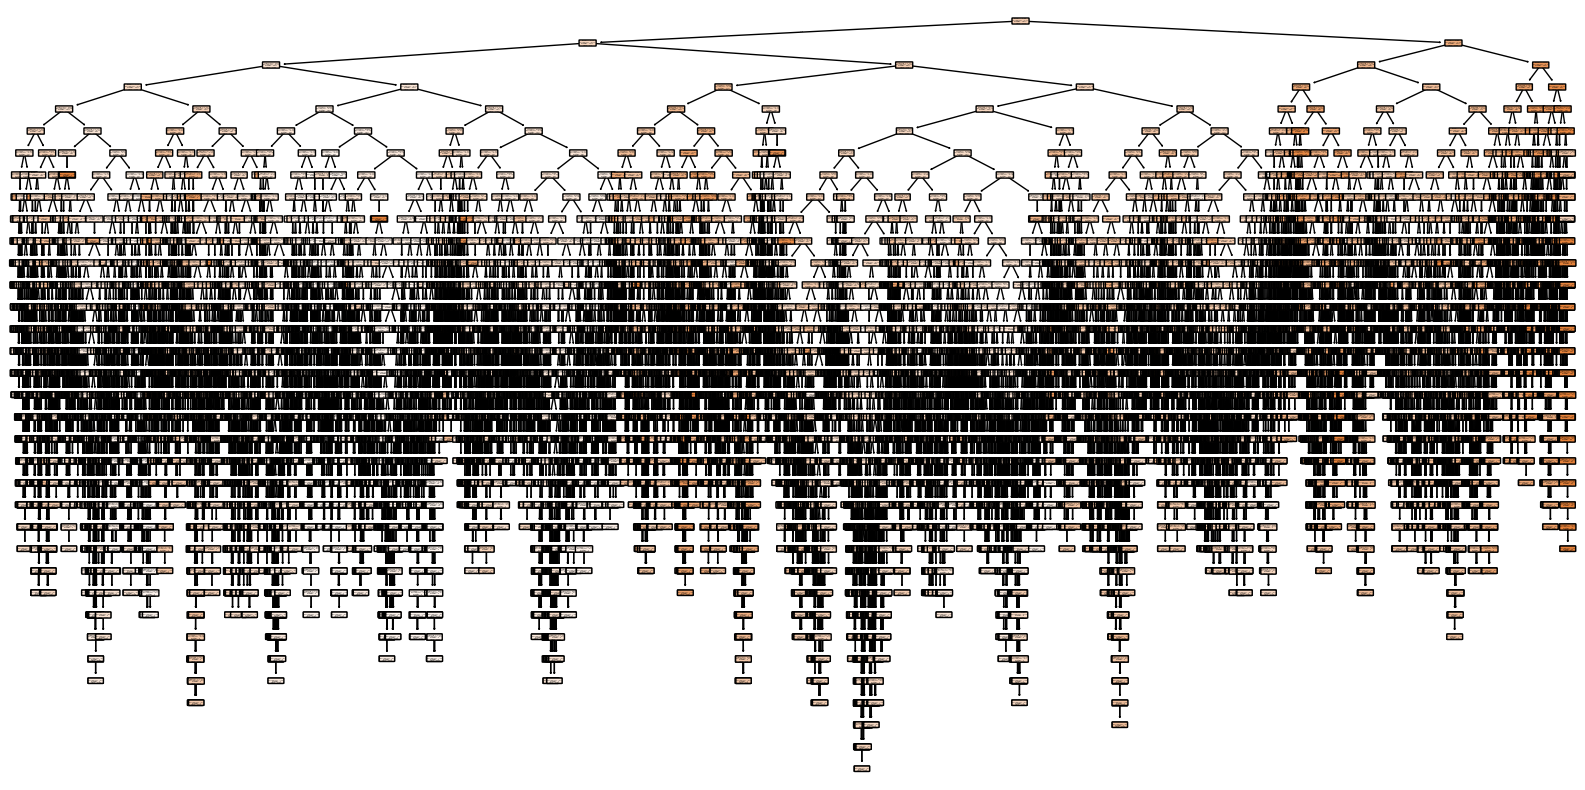

In [1]:
# Import necessary libraries
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
from sklearn import tree
import matplotlib.pyplot as plt

# Load the California Housing dataset
housing = fetch_california_housing()
X = housing.data
y = housing.target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Decision Tree Regressor
regressor = DecisionTreeRegressor(random_state=42)

# Train the model
regressor.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = regressor.predict(X_test)

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

# Feature names for the California housing dataset
feature_names = housing.feature_names  # Manually specify the feature names

# Visualize the decision tree
plt.figure(figsize=(20,10))
tree.plot_tree(regressor, feature_names=feature_names, filled=True, rounded=True)
plt.show()
